# ***TASK8***
## Registration/referral ID - SIRSS2327
## Full Name: Prakanshu Pathak.
## College: Maharaja Surajmal Institute Of Technology

## ***Heart Attack Analysis and prediction***
## TASK = Analysis & Predict Heart Attack based on Age, Gender, No. of disease they have and some other aspects

## Age : Age of the patient

## Sex : Sex of the patient

## exang: exercise induced angina (1 = yes; 0 = no)
## Angina: type of chest pain caused by reduced blood flow to the heart. 

## ca: number of major vessels (0-3)

## cp : Chest Pain type chest pain type

## Value 1: typical angina
## Value 2: atypical angina
## Value 3: non-anginal pain
## Value 4: asymptomatic

## trtbps : resting blood pressure (in mm Hg)

## chol : cholestoral in mg/dl fetched via BMI sensor

## fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

## rest_ecg : resting electrocardiographic results

## Value 0: normal
## Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
## Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

## thalach : maximum heart rate achieved

## target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df1 = pd.read_csv('C:\\Users\\AYUSHI CHOUDHARY\\Desktop\\Machine learning\\Python code wd harry_regex\\Regex assignment\\heart.csv')

In [4]:
df1.sample(6)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0


In [5]:
df1.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df1.duplicated().sum()

1

In [8]:
df1[df1.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df1 = df1.drop_duplicates()

In [10]:
df1.duplicated().sum()

0

In [11]:
df1.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1


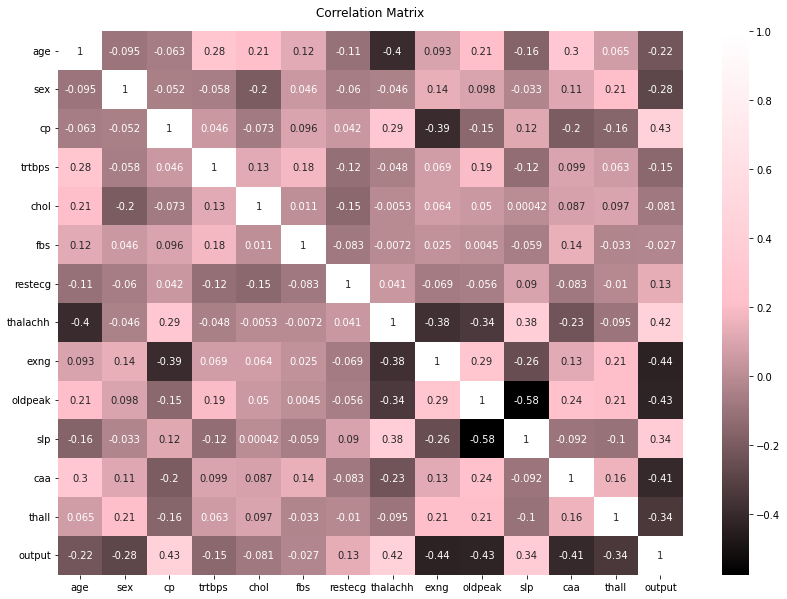

In [12]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["black", "pink", "w"], N=256) 
plt.figure(figsize = (14,10))
sns.heatmap(df1.corr(), cmap = cmap, annot = True)
plt.title('Correlation Matrix',pad = 15)
plt.show()

## From the Heatmap we find that  cp(Chest Pain type),  thalach(maximum heart rate achieved) positively correlated.
## Also exng(exercise induced angina) and oldpeak(depression induced by exercise relative to rest) are negatively correlated to the output

C:\Users\AYUSHI CHOUDHARY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


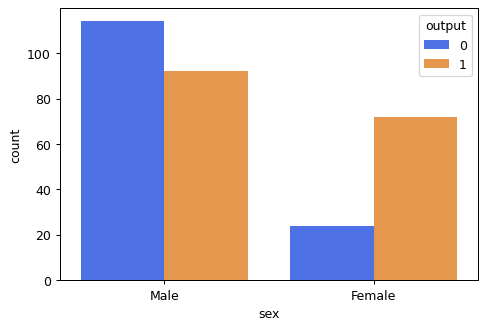

In [13]:
plt.figure(dpi = 90)
sex_data = df1.sex.map({1: 'Male', 0: 'Female'})
sns.countplot(sex_data, hue = df1.output, palette = 'bright', alpha = 0.8)
plt.show()

C:\Users\AYUSHI CHOUDHARY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


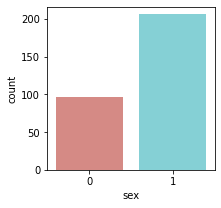

In [14]:
plt.figure(figsize = [3,3])
sns.countplot(df1.sex , palette = 'hls' , alpha = 0.8)
plt.show()

## here 0 : Female,  1 : Male

## We cant conclude that male patients are more than female patients as the total count of female patients is lesser than male patients

C:\Users\AYUSHI CHOUDHARY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


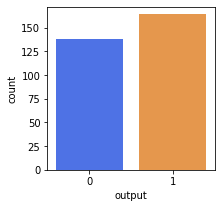

In [15]:
plt.figure(figsize = [3,3])
sns.countplot(df1.output ,palette = 'bright', alpha = 0.8)
plt.show()

In [16]:
df1['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [17]:
df1['chol'].value_counts()

204    6
197    6
234    6
212    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

C:\Users\AYUSHI CHOUDHARY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


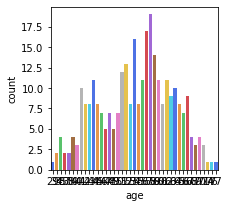

In [18]:
plt.figure(figsize = [3,3])
sns.countplot(df1.age ,palette = 'bright', alpha = 0.8)
plt.show()

C:\Users\AYUSHI CHOUDHARY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


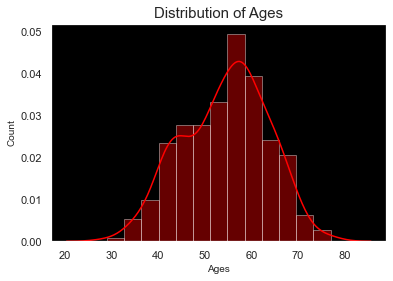

In [19]:
# Age
sns.set(rc = {'axes.facecolor': 'black', 'axes.grid': False,})

sns.distplot(df1['age'], color='red')
plt.title('Distribution of Ages', fontsize=15)
plt.xlabel('Ages', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

## From this plot we conclude that maximum heart attack patients are from the age of 45 to 65 (approximately).

C:\Users\AYUSHI CHOUDHARY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


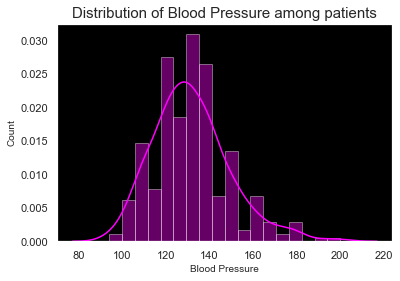

In [20]:
# Blood Pressure
sns.set(rc = {'axes.facecolor': 'black', 'axes.grid': False,})

sns.distplot(df1['trtbps'], color='magenta')
plt.title('Distribution of Blood Pressure among patients', fontsize=15)
plt.xlabel('Blood Pressure', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

C:\Users\AYUSHI CHOUDHARY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


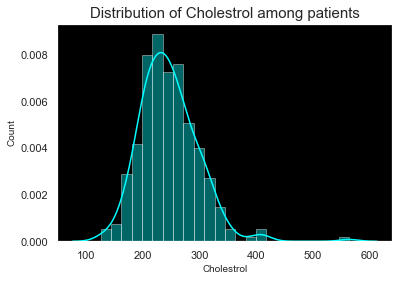

In [21]:
# Cholesterol rate
sns.distplot(df1['chol'], color='cyan')
plt.title('Distribution of Cholestrol among patients', fontsize=15)
plt.xlabel('Cholestrol', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

## Now Lets find relation of output with other columns

In [22]:
features = ['cp','fbs','restecg','exng','slp','caa','thall']

In [23]:
list(enumerate(features))

[(0, 'cp'),
 (1, 'fbs'),
 (2, 'restecg'),
 (3, 'exng'),
 (4, 'slp'),
 (5, 'caa'),
 (6, 'thall')]

In [24]:
df1['restecg'].value_counts()

1    151
0    147
2      4
Name: restecg, dtype: int64

C:\Users\AYUSHI CHOUDHARY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AYUSHI CHOUDHARY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AYUSHI CHOUDHARY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wi

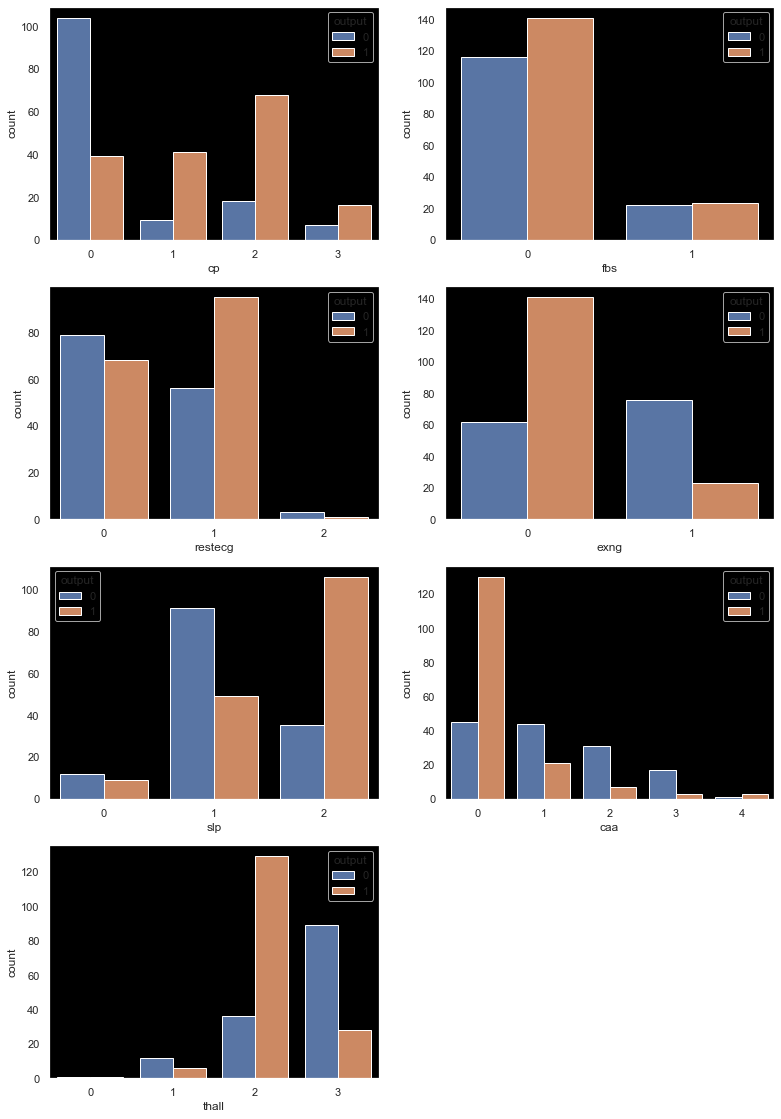

In [25]:
plt.figure(figsize = (13,30))
for i in enumerate(features):
    plt.subplot(6, 2, i[0]+1)
    sns.countplot(i[1], hue = 'output',data = df1)
plt.show()

## the people with maximum heart rate have more risk of heart attack - (thall) - maximum heart rate achieved

In [26]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X = df1.iloc[: , :-1]
Y = df1.iloc[: , -1]

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size = (0.3))


## Training Different ML models

In [29]:
# Hyperparameter Tuning
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
}

In [30]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,svm,0.839203,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.834441,{'n_estimators': 10}
2,logistic_regression,0.844075,{'C': 1}


# logistic regression - best score

In [31]:
model_lg = LogisticRegression(solver='liblinear',multi_class='auto')
model_lg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [32]:
pred = model_lg.predict(x_test)
pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [33]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred)
cm

array([[26, 14],
       [ 6, 45]], dtype=int64)

## Not the best result though...Lets find the other metrics also

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.8181818181818181

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7802197802197802

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test, pred)

0.7627118644067796

In [38]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.8823529411764706